## Abalone Case Study

Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone. 

In [84]:
#importing required liberary

#data lib
import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV

#models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
#metrices
from sklearn.metrics import r2_score

from sklearn.metrics import mean_absolute_error,mean_squared_error
#save

import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing dataset
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')

data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
#Target variable is 'Rings' and its regression problem.

print(data["Rings"].value_counts())

print(data.shape)

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
26      1
29      1
25      1
1       1
2       1
Name: Rings, dtype: int64
(4177, 9)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


all features are numeric apart from 'Sex' will encode it/ no null value.

In [5]:
data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

data set have no null values

In [6]:
#checking if any duplicate value in dataframe & there is no duplicacy.

dup=data.duplicated()
dup.sum()

0

In [7]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Describe-min height is 0 which seems an outlier/ will check it using other techniques.
count of all features is 4177 so missing value.

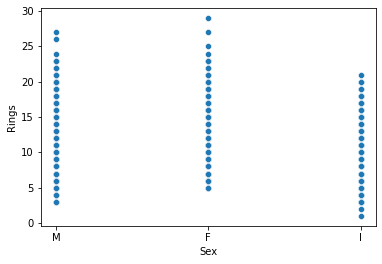

In [8]:
#testing categorigal column corelation-its clearly shown relation.

sns.scatterplot(x='Sex',y='Rings',data=data)
plt.show()

### Encoding

In [9]:
#encoding categorical column to numerical.

enc=pd.get_dummies(data['Sex'])

In [10]:
data=pd.concat([data,enc],axis=1).drop(columns=['Sex'])

In [11]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


### Testing corelation/ multicollinearity using heatmap

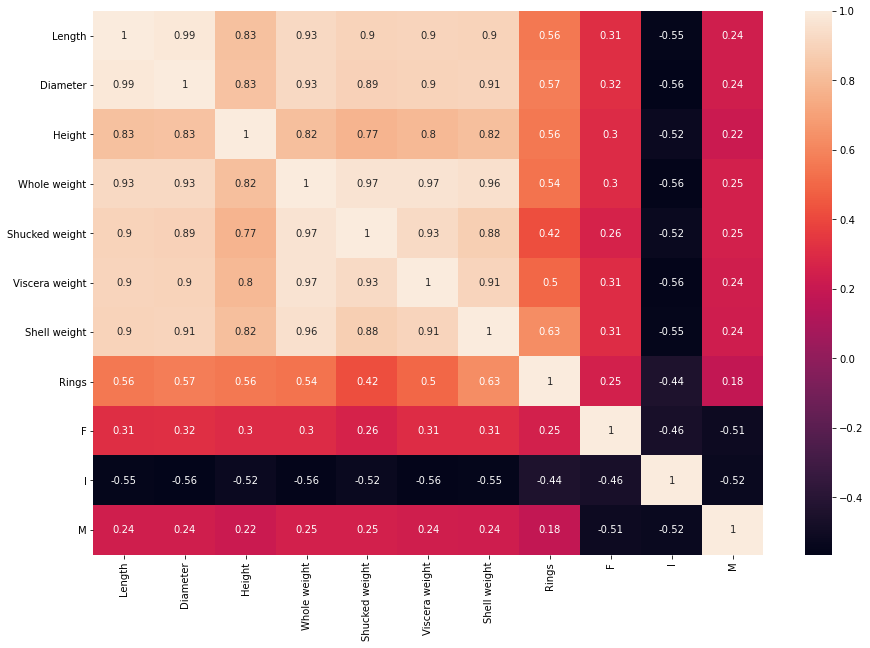

In [12]:

data_cor=data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(data_cor,annot=True)
plt.show()

### Outcome of Correlation:

Its observed with this chart that target 'Rings' correlated with all features except 'I' column which is sub-feature of Sex.
multicollinearity also observed with multiple columns. will verify it VIF and then we can remove some of the features.
Target have strongest relationship with 'shell weight'.
'Diameter' is 99% correlated with length so we can remove one of the feature.
few other features also their with multicollinearity problem.

### Testing data distribution/skewness using distplot

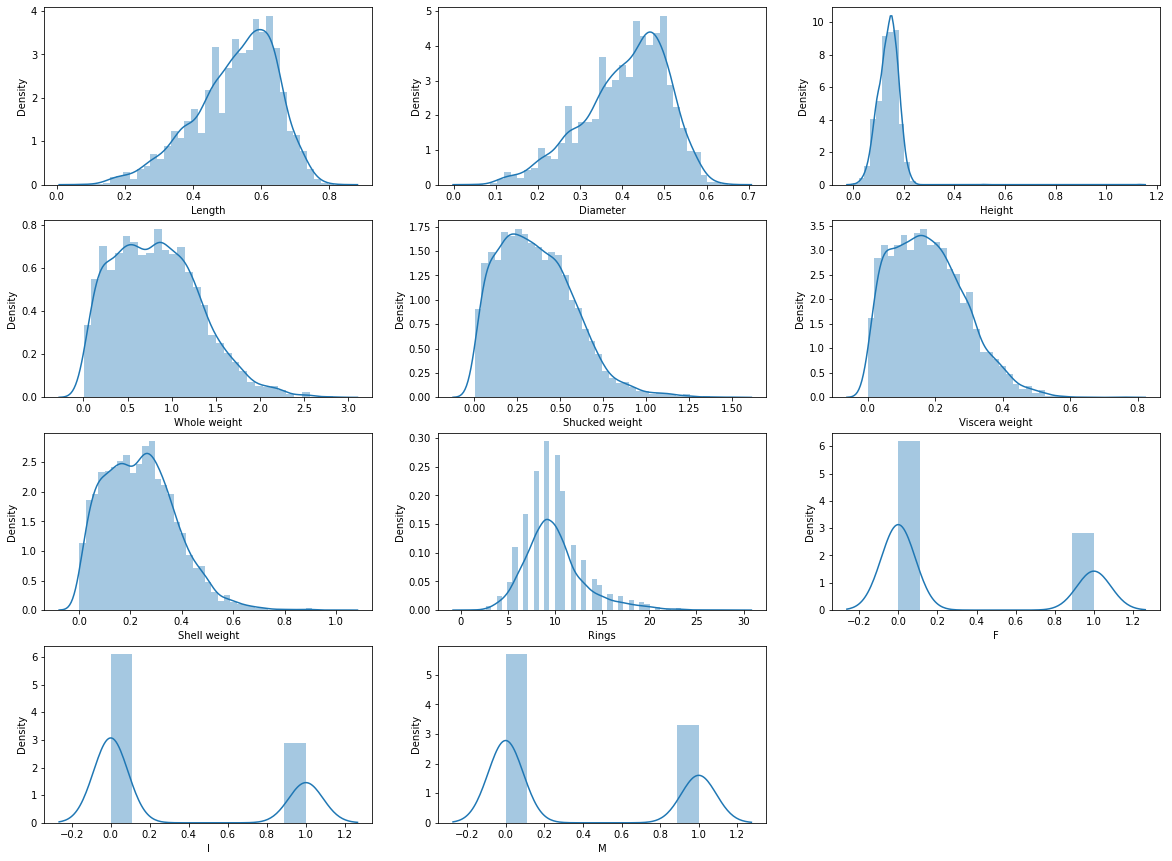

In [13]:
plt.figure(figsize=(20,15))

plotnumber=1

for col in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[col])
        
    plotnumber+=1
    
plt.show()

Observation from distplot: 

Most of the features are not normally distributed.
skewness clearly reflecting there so will try to remove outliers.

### Testing outliers using boxplot:

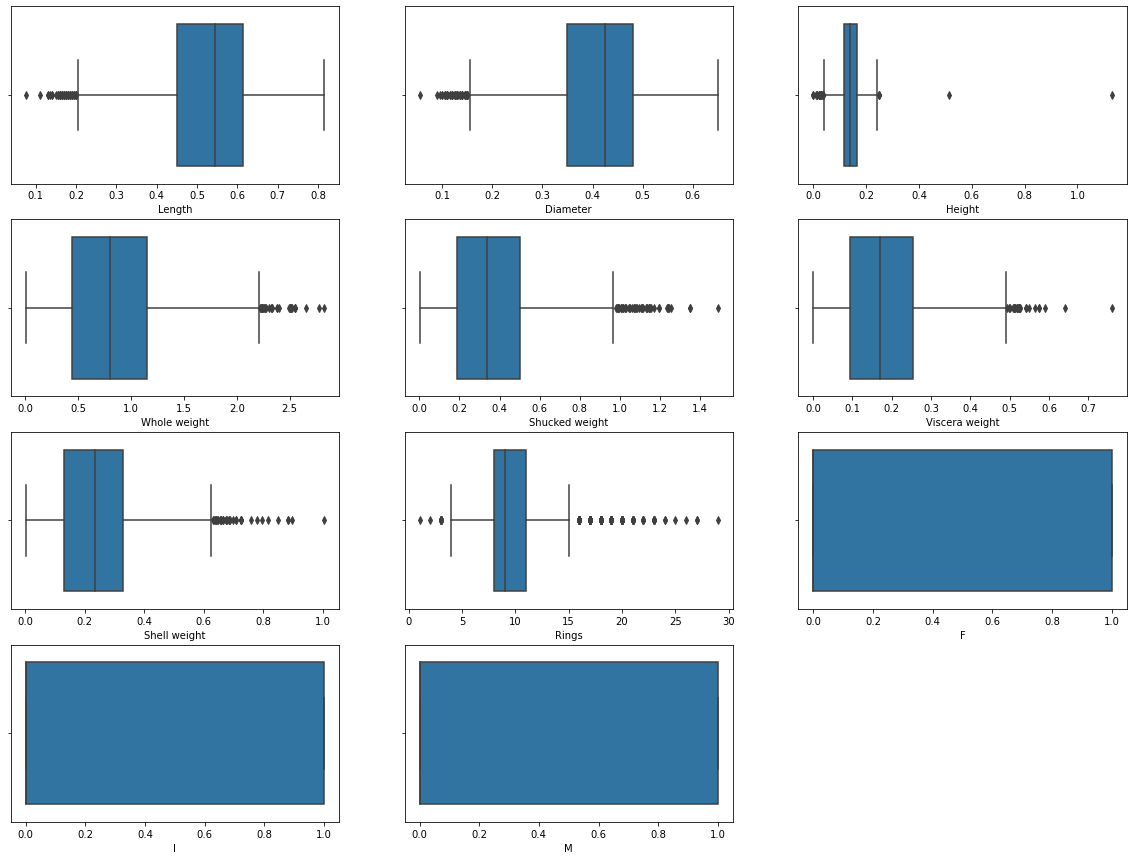

In [14]:
plt.figure(figsize=(20,15))

plotnumber=1

for col in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(data[col])
        
    plotnumber+=1
    
plt.show()

### Removing outliers

In [135]:
#z-score technique to remove outliers

from scipy.stats import zscore
z=np.abs(zscore(data))
z.shape

(4177, 11)

In [134]:
data_new=data[(z<=3).all(axis=1)]
print(data.shape)
print(data_new.shape)

(4177, 11)
(4027, 11)


In [136]:
#loss data percentage after removing outliers:
print((4177-4027)/4177*100)

3.5910940866650707


In [137]:
data_new.sample(5)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
951,0.480,0.360,0.100,0.4390,0.1940,0.0990,0.1150,8,0,0,1
1561,0.450,0.340,0.095,0.3245,0.1385,0.0640,0.1050,8,0,1,0
1822,0.720,0.560,0.180,1.5865,0.6910,0.3750,0.4425,11,0,0,1
2754,0.525,0.385,0.130,0.6070,0.2355,0.1250,0.1950,8,0,1,0
3552,0.525,0.390,0.105,0.5670,0.2875,0.1075,0.1600,8,0,1,0


### Data Transformation to remove skewness

In [19]:
from sklearn.preprocessing import power_transform

In [138]:
#divide data in target and features

X=data_new.drop(columns=['Rings'])
y=data_new.Rings

In [139]:
X_new=power_transform(X)
X=pd.DataFrame(X_new,columns=X.columns)

In [140]:
X.skew()

Length           -0.082985
Diameter         -0.080956
Height           -0.015962
Whole weight     -0.016797
Shucked weight    0.021815
Viscera weight    0.035902
Shell weight      0.016660
F                 0.821149
I                 0.731618
M                 0.576507
dtype: float64

Skewness removed now and its now in range of -0.082 to 0.576

### Scaling

In [141]:
scale=StandardScaler()
x_scale=scale.fit_transform(X)

### Multicollinearity with VIF

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [142]:

vif=pd.DataFrame()

vif['vif']=[variance_inflation_factor(x_scale,i) for i in range(x_scale.shape[1])]

vif["features"]=X.columns

vif

,vif,features
0,34.958679,Length
1,33.590478,Diameter
2,6.529690,Height
3,136.691870,Whole weight
4,36.349121,Shucked weight
5,22.138565,Viscera weight
6,30.134628,Shell weight
7,inf,F
8,inf,I
9,inf,M


Since its clearly interpreted by vif score that columns are having strong relationship with each other,
same was observed with heatmap as well.
but as we have limited data so not removing any of the features.

### Model Building

Train test split

In [143]:
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.25,random_state=355)

its a regression problem so will start with linear regression

In [144]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

#evaluation
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred)*100)

1.4942032996353993
3.939874816142441
1.9849117905192766
53.409137246296204


Since r2 score is too low will try with other algorithm

In [145]:
rf=RandomForestRegressor()

rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

#evaluation
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred)*100)

1.399811320754717
3.5861160873882825
57.59249970029602


In [146]:
sv=SVR()

sv.fit(x_train,y_train)
y_pred=sv.predict(x_test)

print(mean_absolute_error(y_test,y_pred))

print(mean_squared_error(y_test,y_pred))
r2_score(y_test,y_pred)

1.3861587128041286
3.717896131767599


0.5603413902949552

Since we are getting best r2 score with Random Forest Regressor but still its low.
will try to improve using hyperparametertunning

### Hyperparametertunning

In [105]:
rfr=RandomForestRegressor()
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.25,random_state=355)

In [112]:
#Hyperparametertunning(GridSearchCV)

params={'n_estimators':[10,15,25],
        'max_depth':[10,20],
        'min_samples_split':[7,10,11],
        'min_samples_leaf':[5,7]
       }

grd=GridSearchCV(rf,param_grid=params)

grd.fit(x_train,y_train)
print(grd.best_params_)

rfr=grd.best_estimator_
rfr.fit(x_train,y_train)

y_pred=rfr.predict(x_test)

print(mean_absolute_error(y_test,y_pred))

print(mean_squared_error(y_test,y_pred))
r2_score(y_test,y_pred)

{'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 25}
1.3873182846310035
3.565728971353263


0.578335868843963

Tried with tunning not accuracy not increasing much.

### Cross Validation

In [114]:
from sklearn.model_selection import cross_val_score

In [116]:
cv_score=cross_val_score(lr,x_scale,y,cv=5)
print("CV score for LogisticRegression ",cv_score.mean())

CV score for LogisticRegression  0.44140744562473966


In [117]:
cv_score=cross_val_score(rf,x_scale,y,cv=5)
print("CV score for RandomForest ",cv_score.mean())

CV score for RandomForest  0.4568211090851383


In [118]:
cv_score=cross_val_score(sv,x_scale,y,cv=5)
print("CV score for SVM ",cv_score.mean())

CV score for RandomForest  0.4888241346563208


Best MAE score achived with RandomForest Classifier r2 score is around 58%

### Save

In [147]:
filename='abalone.pickle'
pickle.dump(rf, open(filename,'wb'))